In [1]:
#Importing Required Libraries
import os
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#Adding Access tokens and secret keys
consumer_key= '' #api key
consumer_secret= '' #api secret key
access_token= ''
access_token_secret= ''

In [17]:
#Authorising access
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [18]:
# Define the search term and the date_since date as variables
search_words = "venus+phosphine+life -filter:retweets"
date_since = "2020-09-10"


In [19]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(100)
tweets


In [20]:
# Iterate and print tweets
#for tweet in tweets:
    #print(tweet.text)

In [21]:
# ABOVE CODE can be replaced by Python List. Collect a list of tweets
#[tweet.text for tweet in tweets]

In [22]:
def remove_url(txt):
     return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [24]:
import re
# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]
#####################################

words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]
words_in_tweet[:2]

[['kokemikal',
  'brittanytrang',
  'i',
  'think',
  'thatd',
  'depend',
  'on',
  'what',
  'else',
  'youre',
  'adding',
  'i',
  'think',
  'theres',
  'phosphine',
  'on',
  'venus',
  'a'],
 ['data',
  'from',
  'an',
  'old',
  'nasa',
  'mission',
  'to',
  'our',
  'sister',
  'planet',
  'may',
  'contain',
  'overlooked',
  'evidence',
  'for',
  'the',
  'gas',
  'phosphine',
  'a',
  'potent']]

In [25]:
import itertools
import collections

#List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)


[('venus', 87),
 ('the', 84),
 ('on', 64),
 ('of', 64),
 ('phosphine', 62),
 ('life', 55),
 ('a', 45),
 ('in', 42),
 ('nasa', 29),
 ('to', 23),
 ('is', 21),
 ('for', 20),
 ('discovery', 20),
 ('have', 17),
 ('may', 16)]

In [26]:
#Create a data frame using pandas
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,venus,87
1,the,84
2,on,64
3,of,64
4,phosphine,62


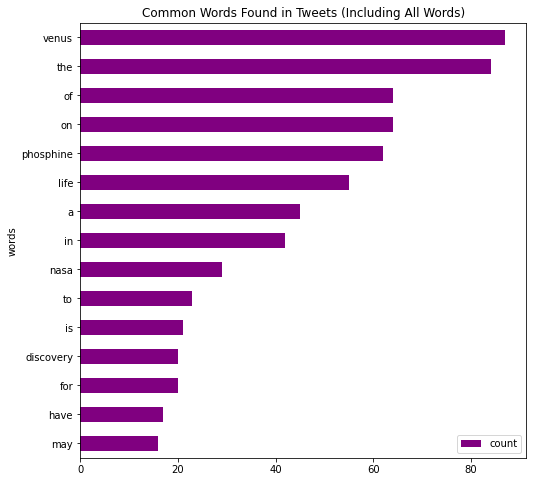

In [27]:
# Plot horizontal bar graph for most used words

fig, ax = plt.subplots(figsize=(8, 8))

clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Drashti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


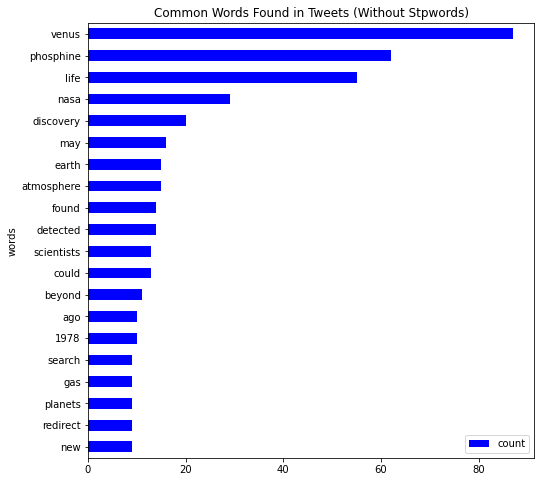

In [29]:
#Removing Stop words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(50)

clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(20),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8,8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in Tweets (Without Stpwords)")

plt.show()

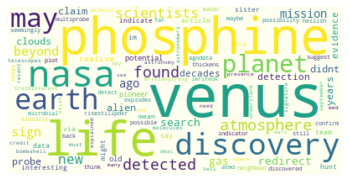

In [30]:
#WordCloud

from wordcloud import WordCloud, ImageColorGenerator

#For defining text according to Description
text = ','.join(all_words_nsw)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=70, max_words=100, collocations=False, background_color="ivory").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
from textblob import TextBlob

all_tweets_no_urls = [TextBlob(tweet) for tweet in tweets_no_urls]

all_tweets_no_urls[:5]

[TextBlob("kokemikal brittanytrang I think thatd depend on what else youre adding I think theres phosphine on Venus a"),
 TextBlob("Data from an old NASA mission to our sister planet may contain overlooked evidence for the gas phosphine a potent"),
 TextBlob("A team of scientists made a bombshell announcement in the journal Nature Astronomy Using telescopes theyd detect"),
 TextBlob("The detection of phosphine in Venus clouds is a big deal Space EarthSky"),
 TextBlob("A NASA Probe May Have Found Signs of Life on Venus 40 Years AgoData from an old NASA mission to our sister plan")]

In [32]:
# Calculate polarity of tweets

venus_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
venus_sent_df = pd.DataFrame(venus_sent_values, columns=["polarity", "tweet"])
venus_sent_df = venus_sent_df[venus_sent_df.polarity != 0]

venus_sent_df.head()

,polarity,tweet
1,0.300000,Data from an old NASA mission to our sister pl...
4,0.100000,A NASA Probe May Have Found Signs of Life on V...
6,0.600000,Is there some kind of life on Venus
8,0.450000,Discovery of Phosphine raised many questions r...
9,0.333333,Imagine if people knocked on your door to talk...


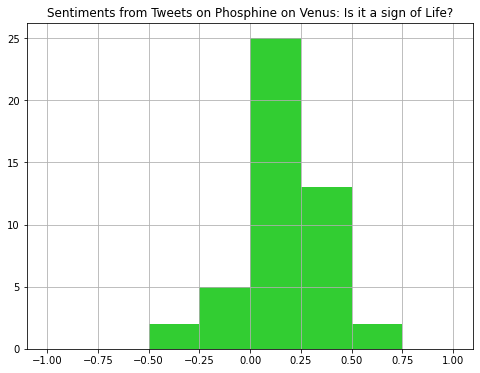

In [33]:
#Plotting the Sentiments on a histogram
fig, ax = plt.subplots(figsize=(8, 6))

venus_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="limegreen")

plt.title("Sentiments from Tweets on Phosphine on Venus: Is it a sign of Life?")
plt.show()


In [35]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
testimonial.sentiment

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)

In [36]:
testimonial.sentiment.subjectivity

0.4357142857142857